In [1]:
import pandas as pd

data_set = pd.read_csv('steam.csv')

In [2]:
data_set.info()  # Get a general idea of what's in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
appid               27075 non-null int64
name                27075 non-null object
release_date        27075 non-null object
english             27075 non-null int64
developer           27075 non-null object
publisher           27075 non-null object
platforms           27075 non-null object
required_age        27075 non-null int64
categories          27075 non-null object
genres              27075 non-null object
steamspy_tags       27075 non-null object
achievements        27075 non-null int64
positive_ratings    27075 non-null int64
negative_ratings    27075 non-null int64
average_playtime    27075 non-null int64
median_playtime     27075 non-null int64
owners              27075 non-null object
price               27075 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 2.8+ MB


In [3]:
# We will be predicting the total ratings a game gets
# Specifically we will make this a binary classification problem where a game can have many or few
# ratings
data_set['total_ratings'] = (data_set['positive_ratings'] + data_set['negative_ratings'])

# Everything above and equal to the median is considered as having many ratings, everything else
# has few ratings
ratings_threshold = data_set['total_ratings'].median()
data_set['total_ratings'] = (data_set['total_ratings'] >= ratings_threshold).astype(int)

In [4]:
# Drop everything we won't need
data_set.drop(columns=['positive_ratings', 'negative_ratings', 'appid', 'name'], axis=1, inplace=True)

In [5]:
# Make a deep copy of our data set for visualization purposes
data_set_visualize = data_set.copy()

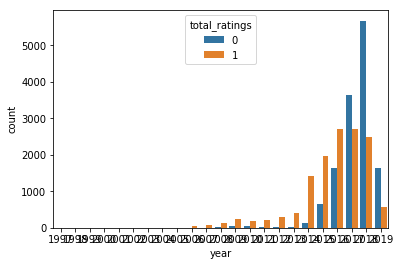

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize release day, month, year and total ratings
data_set_visualize['release_date'] = pd.to_datetime(data_set_visualize['release_date'])
data_set_visualize['year'], data_set_visualize['month'], data_set_visualize['day'] = data_set_visualize['release_date'].dt.year, \
                                                        data_set_visualize['release_date'].dt.month, \
                                                        data_set_visualize['release_date'].dt.day

# Year and total ratings
sns.countplot(x='year', hue='total_ratings', data=data_set_visualize)
plt.show()

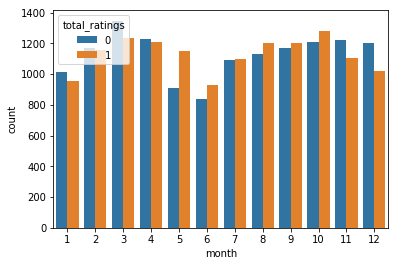

In [7]:
# Games released in 2016 and before have more games with many reviews than games with few

# Look at month and total ratings
sns.countplot(x='month', hue='total_ratings', data=data_set_visualize)
plt.show()

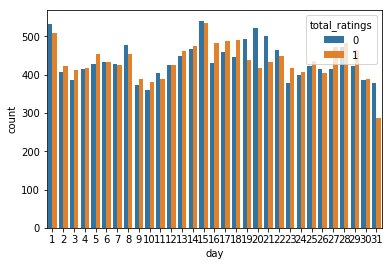

In [8]:
# No meaningful relationship between release month and total ratings

# Look at date and total ratings
sns.countplot(x='day', hue='total_ratings', data=data_set_visualize)
plt.show()

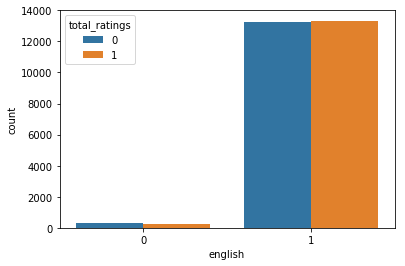

In [9]:
# No meaningful relationship between release day and total ratings

# Look at English language support and total ratings
sns.countplot(x='english', hue='total_ratings', data=data_set_visualize)
plt.show()

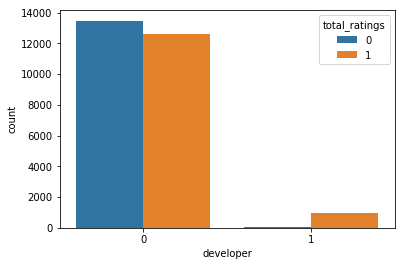

In [10]:
# More games with English support than without, but virtually no difference in games with many and
# few ratings in English and non-English categories

# Visualize developer with total ratings
# Specifically look at how the top 250 developers relate to total ratings
dev_pub_data = pd.read_csv('top-dev-pub.csv')
top_dev = dev_pub_data['developer'].tolist()
data_set_visualize['developer'] = data_set_visualize['developer'].apply(lambda x: any([developer in x for developer in top_dev])).astype(int)
sns.countplot(x='developer', hue='total_ratings', data=data_set_visualize)
plt.show()

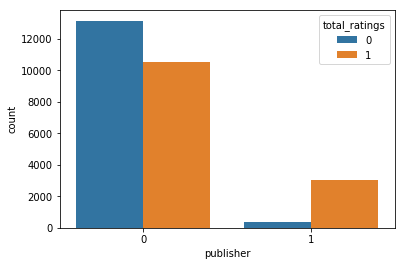

In [11]:
# Games by top developers have virtually no games with few ratings

# Let's visualize the same relationship but with top 250 publishers
top_pub = dev_pub_data['publisher'].tolist()
data_set_visualize['publisher'] = data_set_visualize['publisher'].apply(lambda x: any([publisher in x for publisher in top_pub])).astype(int)
sns.countplot(x='publisher', hue='total_ratings', data=data_set_visualize)
plt.show()

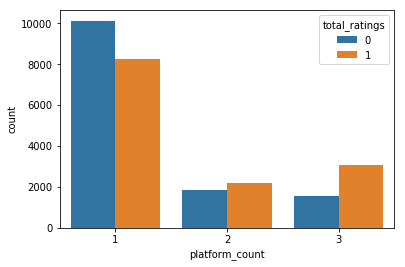

In [12]:
# Games by top publishers also have virtually no games with few ratings

# Visualize number of platforms
data_set_visualize['platform_count'] = data_set_visualize['platforms'].apply(lambda x: len(x.split(';')))
sns.countplot(x='platform_count', hue='total_ratings', data=data_set_visualize)
plt.show()

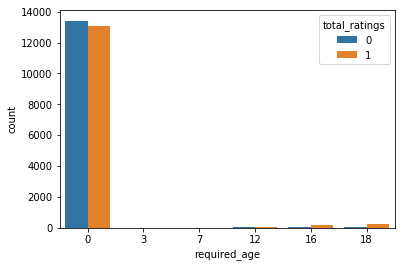

In [13]:
# Higher number of supported platforms gives more total ratings

# Visualize required age and total ratings
sns.countplot(x='required_age', hue='total_ratings', data=data_set_visualize)
plt.show()

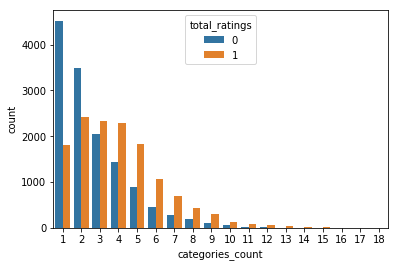

In [14]:
# 16 & 18 years old have more games with many reviews than with few, but very small amount of
# games in these categories

# Look at number of categories and total ratings
data_set_visualize['categories_count'] = data_set_visualize['categories'].apply(lambda x: len(x.split(';')))
sns.countplot(x='categories_count', hue='total_ratings', data=data_set_visualize)
plt.show()

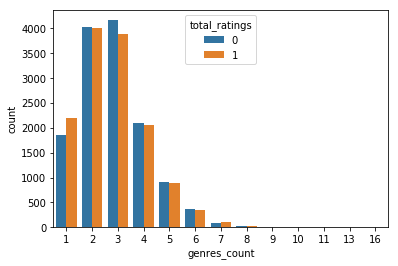

In [15]:
# Games with >= 5 categories are more likely to have many reviews

# Look at number of genres and total ratings
data_set_visualize['genres_count'] = data_set_visualize['genres'].apply(lambda x: len(x.split(';')))
sns.countplot(x='genres_count', hue='total_ratings', data=data_set_visualize)
plt.show()

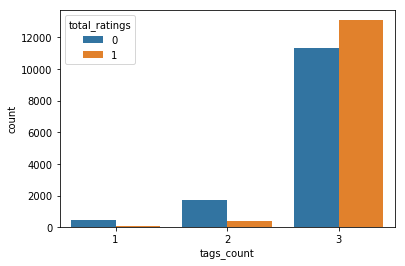

In [16]:
# Every genre count gives roughly same number of games with many & few ratings

# Look at Steamspy tags and total ratings
data_set_visualize['tags_count'] = data_set_visualize['steamspy_tags'].apply(lambda x: len(x.split(';')))
sns.countplot(x='tags_count', hue='total_ratings', data=data_set_visualize)
plt.show()

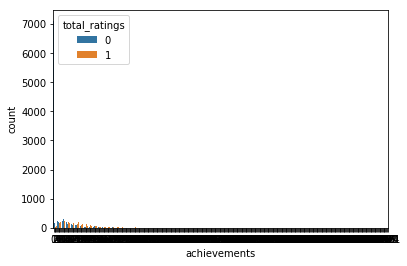

In [17]:
# Games with <= 2 Steamspy tags seem to be more likely to have few reviews

# Achievements with total ratings
sns.countplot(x='achievements', hue='total_ratings', data=data_set_visualize)
plt.show()

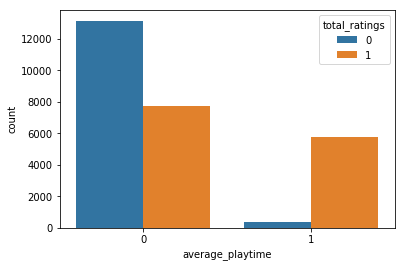

In [18]:
# Every number of achievements gives roughly same numbers of games with many & few ratings

# Average playtime's relationship with total ratings
data_set_visualize['average_playtime'] = (data_set_visualize['average_playtime'] >= 1.0).astype(int)
sns.countplot(x='average_playtime', hue='total_ratings', data=data_set_visualize)
plt.show()

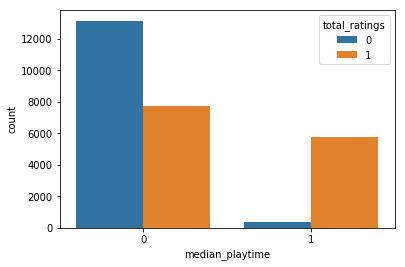

In [19]:
# Games with >0 average playtime tend to have many reviews

# Median playtime's relationship with total ratings
data_set_visualize['median_playtime'] = (data_set_visualize['median_playtime'] >= 1.0).astype(int)
sns.countplot(x='median_playtime', hue='total_ratings', data=data_set_visualize)
plt.show()

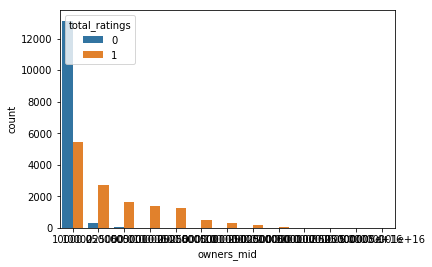

In [20]:
# Games with >0 median playtime tend to have many reviews

# Number of owners and total ratings

# Data set gives a range, we'll take the midpoint
data_set_visualize['owners_lower'] = data_set_visualize['owners'].str.split('-', expand=True)[0]
data_set_visualize['owners_upper'] = data_set_visualize['owners'].str.split('-', expand=True)[1]
data_set_visualize['owners_mid'] = data_set_visualize[['owners_lower', 'owners_upper']].mean(axis=1)

sns.countplot(x='owners_mid', hue='total_ratings', data=data_set_visualize)
plt.show()

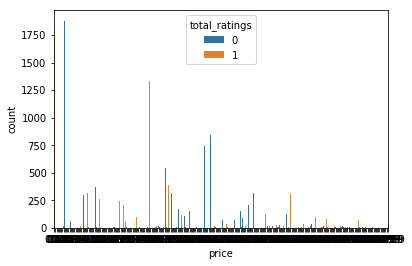

In [21]:
# Midpoint > 10000 gives more chances of having many ratings

# Price and total ratings
sns.countplot(x='price', hue='total_ratings', data=data_set_visualize)
plt.show()

In [22]:
# Doesn't seem to be a pattern with price and total ratings: some low price tags have many more
# games with few reviews than many reviews but some higher price tags show the same (and same
# can be said for higher price tags)

In [23]:
# Now that we've done some data exploration, we can pre-process the data according to what we've found
# Here we're working directly with the data set rather than its deep copy, and create a CSV of cleaned data from it

# Drop everything we've seen don't affect total ratings
data_set.drop(['english', 'required_age', 'achievements', 'genres', 'price'], axis=1, inplace=True)

# Binarize the release year, with 2016 as the threshold; every year that's 2016 and before is 1
data_set['release_date'] = pd.to_datetime(data_set['release_date'])
data_set['year'] = data_set['release_date'].dt.year
data_set['year'] = (data_set['year'] <= 2016).astype(int)
data_set.drop(['release_date'], axis=1, inplace=True)

# Binarize developer data; top 250 developers become 1
data_set['developer'] = data_set['developer'].apply(lambda x: any([developer in x for developer in top_dev])).astype(int)

# Binarize publisher data; top 250 publishers become 1
data_set['publisher'] = data_set['publisher'].apply(lambda x: any([publisher in x for publisher in top_pub])).astype(int)

# Get a count of the number of supported platforms then binarize the count data; 2+ platforms become 1
data_set['platform_count'] = data_set['platforms'].apply(lambda x: len(x.split(';')))
data_set['platform_count'] = (data_set['platform_count'] >= 2).astype(int)
data_set.drop(['platforms'], axis=1, inplace=True)

# Get a count of the number of categories listed then binarize the data; 5+ categories become 1
data_set['categories_count'] = data_set['categories'].apply(lambda x: len(x.split(';')))
data_set['categories_count'] = (data_set['categories_count'] >= 5).astype(int)
data_set.drop(['categories'], axis=1, inplace=True)

# Get a count of the number of Steamspy tags listed then binarize the data; 2+ tags become 1 
data_set['tags_count'] = data_set['steamspy_tags'].apply(lambda x: len(x.split(';')))
data_set['tags_count'] = (data_set['tags_count'] <= 2).astype(int)
data_set.drop(['steamspy_tags'], axis=1, inplace=True)

# Binarize average playtime; playtime that's greater or equal to 1 becomes 1
data_set['average_playtime'] = (data_set['average_playtime'] >= 1.0).astype(int)

# Binarize median playtime; playtime that's greater or equal to 1 becomes 1
data_set['median_playtime'] = (data_set['median_playtime'] >= 1.0).astype(int)

# Binarize number of owners; >10000 owners beecomes 1
data_set['owners_lower'] = data_set['owners'].str.split('-', expand=True)[0]
data_set['owners_upper'] = data_set['owners'].str.split('-', expand=True)[1]
data_set['owners_mid'] = data_set[['owners_lower', 'owners_upper']].mean(axis=1)
data_set['owners_mid'] = (data_set['owners_mid'] > 10000).astype(int)
data_set.drop(['owners_lower', 'owners_upper', 'owners'], axis=1, inplace=True)

# Re-order the data frame into the order we want
data_set = data_set[['year', 'developer', 'publisher', 'platform_count', 'categories_count', 'tags_count',
                     'average_playtime', 'median_playtime', 'owners_mid', 'total_ratings']]

print(data_set.head(20))  # Check that the data frame looks how we want it (order of columns, data typess in columns)

    year  developer  publisher  platform_count  categories_count  tags_count  \
0      1          1          1               1                 0           0   
1      1          1          1               1                 0           0   
2      1          1          1               1                 0           0   
3      1          1          1               1                 0           0   
4      1          0          1               1                 0           0   
5      1          1          1               1                 0           0   
6      1          1          1               1                 1           0   
7      1          1          1               1                 0           0   
8      1          0          1               1                 0           0   
9      1          1          1               1                 1           0   
10     1          1          1               1                 1           0   
11     1          1          1          

In [24]:
# Select and train models

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

data_array = data_set.values
input_array = data_array[:, 1:10]
output_array = data_array[:, 10]
validation_size = 0.20
input_train, input_validation, output_train, output_validation = model_selection.train_test_split(input_array, output_array, test_size=validation_size, random_state=42)

